# Homework 4
#### By Group 16
In this homework you are to study, implement and to test the spectral graph clustering algorithm as described in the paper “On Spectral Clustering: Analysis and an algorithm” by Andrew Y. Ng, Michael I. Jordan, Yair Weiss. Using your implementation of the K-eigenvector algorithm, you are to analyse two sample graphs.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px


### Part 1: A Real Graph
The dataset contains of 2196 edges. All edges in the dataset are distinct and have no self-loops. No weight is given for the edges, so we assume that the weight between node A and B is equal to one if node A and node B are connected and zero otherwise. Note that the tuples are not coordinates of the points, but represents the ids of the nodes which are linked together.

In [27]:
df = pd.read_csv('example1.dat', sep=",", header=None)
edge_tuples = [tuple(x) for x in df.to_numpy()]    
len(edge_tuples)

2196

In [3]:
graph = nx.from_pandas_edgelist(df,0,1) # df has columns named 0, 1

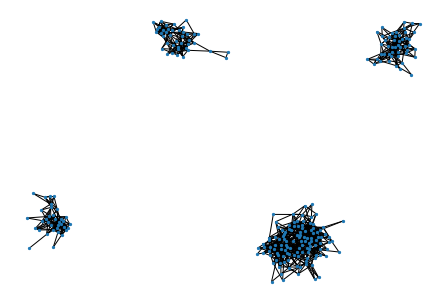

In [4]:
nx.draw(graph,node_size=5)

Given a set of points $S=\{s_1, \ldots, s_n\}$ in $\mathbb{R}^l$ that we want to cluster into k subsets:

1. Form the affinity matrix A defined by $A_{ij}=e^{-||s_i-s_j||^2/2 \sigma^2)}$ if $i \neq j$, and $A_{ij}=0$.

An affinity matrix is just like an adjacency matrix, except the value for a pair of points expresses how similar those points are to each other. If pairs of points are very dissimilar then the affinity should be 0. If the points are identical, then the affinity might be 1. In this way, the affinity acts like the weights for the edges on our graph. Thus affinity matrix represents the weighted links. In our case, if the nodes are connected then the weight is equal to one, otherwise zero. 

In [15]:
A = np.array(nx.adjacency_matrix(graph).todense())
print(A)

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


2. Define $D$ to be the diagonal matrix whose $(i,i)$-element is the sum of $A$'s $i$-th row, and construct the matrix $L=D^{-1/2} AD^{-1/2}$.

In [17]:
D = np.diag(np.sum(A, axis=1)) #0 or 1 because it is symmetrical
Dsqrt = np.sqrt(D)
Dfinal = np.linalg.inv(Dsqrt)
print(D)

[[7 0 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]]


In [18]:
L = np.dot(Dfinal,np.dot(A,Dfinal))
print(L)

[[0.         0.13363062 0.12598816 ... 0.         0.         0.        ]
 [0.13363062 0.         0.         ... 0.         0.         0.        ]
 [0.12598816 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


3. Find $x_1, x_2, \ldots, x_k$, the $k$ largest eigenvectors of $L$ (chosen to be orthogonal to each other in the case of repeated eigenvalues), and form the matrix $X=[x_1x_2 \ldots x_k] \in \mathbb{R}^{n \times k}$ by stacking the eigenvectors in columns. 

In [126]:
#eigh will return sorted eigenvalues and is faster because it takes advantage of the symmetry of the matrix
eigenvalues, eigenvectors = np.linalg.eigh(L)

In [23]:
lista = list(eigenvalues)
#we select k to be where the eigengap is the biggest
# -1 because we check n-1 differences
#i substract from the number of eigenvalues because we want the largest eigenvalues and they are sorted with ascending
k = len(lista) - 1 - np.argmax([x - lista[i - 1] for i, x in enumerate(lista)][1:])  
print(k)

4


In [64]:
sel_eigen = eigenvectors[:,-k:] #ordered as seen in eigenvectors
print(len(sel_eigen) == len(set(list(df[0])+list(df[1])))) # check dimensions
print(len(sel_eigen[0]) == k)

True
True


4. Form the matrix $Y$ from $X$ by renormalizing each of $X$'s rows to have unit length (i.e. $Y_{ij}=X_{ij} / (\sum_{j} X_{ij}^2)^{1/2}$.

In [45]:
Y = []
for i in sel_eigen:
    div = np.linalg.norm(i)   #by default norm2 
    Y.append(i/div) 
Yfinal = np.array(Y)    

5. Treating each row of $Y$ as a point in $\mathbb{R}^k$, cluster them into $k$ clusters via K-means or any other algorithm that attempts to minimize distortion. 

In [48]:
clusters = KMeans(n_clusters=k).fit(Yfinal)
labels = clusters.labels_

6. Finally, assign the original point $s_i$ to cluster $j$ iff row $i$ of the matrix $Y$ was assigned to cluster $j$. 

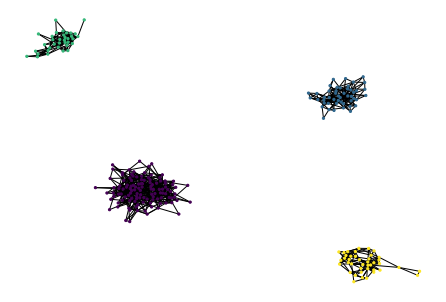

In [49]:
nx.draw(graph, node_size=5, node_color=labels)
plt.show()

### Part 2: A Synthetic Graph
The following dataset has the same structure as the dataset in part 1. It, however, consists of an extra column which consists of only values 1. So, the assumption we made previously in part 1 still holds here.

In [51]:
df2 = pd.read_csv('example2.dat', sep=",", header=None)
len(df2)

2418

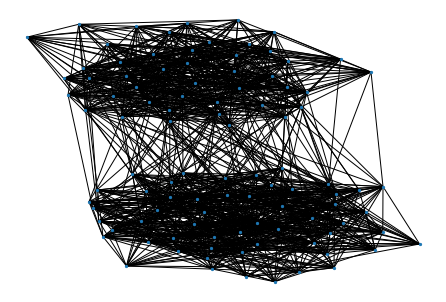

In [52]:
graph2 = nx.from_pandas_edgelist(df2,0,1)
nx.draw(graph2,node_size=5)
plt.show()

Given a set of points $S=\{s_1, \ldots, s_n\}$ in $\mathbb{R}^l$ that we want to cluster into k subsets:

1. Form the affinity matrix A defined by $A_{ij}=e^{-||s_i-s_j||^2/2 \sigma^2)}$ if $i \neq j$, and $A_{ij}=0$.

An affinity matrix is just like an adjacency matrix, except the value for a pair of points expresses how similar those points are to each other. If pairs of points are very dissimilar then the affinity should be 0. If the points are identical, then the affinity might be 1. In this way, the affinity acts like the weights for the edges on our graph. Thus affinity matrix represents the weighted links. In our case, if the nodes are connected then the weight is equal to one, otherwise zero. 

In [53]:
A2 = np.array(nx.adjacency_matrix(graph2).todense())
print(A2)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


2. Define $D$ to be the diagonal matrix whose $(i,i)$-element is the sum of $A$'s $i$-th row, and construct the matrix $L=D^{-1/2} AD^{-1/2}$.

In [54]:
D2 = np.diag(np.sum(A2, axis=1))
Dsqrt2 = np.sqrt(D2)
Dfinal2 = np.linalg.inv(Dsqrt2)
print(Dfinal2)

[[0.24253563 0.         0.         ... 0.         0.         0.        ]
 [0.         0.20851441 0.         ... 0.         0.         0.        ]
 [0.         0.         0.23570226 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.2236068  0.         0.        ]
 [0.         0.         0.         ... 0.         0.2        0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


In [56]:
L2 = np.dot(Dfinal2,np.dot(A2,Dfinal2))
print(L2)

[[0.         0.05057217 0.         ... 0.         0.         0.        ]
 [0.05057217 0.         0.04914732 ... 0.         0.         0.        ]
 [0.         0.04914732 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


3. Find $x_1, x_2, \ldots, x_k$, the $k$ largest eigenvectors of $L$ (chosen to be orthogonal to each other in the case of repeated eigenvalues), and form the matrix $X=[x_1x_2 \ldots x_k] \in \mathbb{R}^{n \times k}$ by stacking the eigenvectors in columns. 

In [57]:
eigenvalues2, eigenvectors2 = np.linalg.eigh(L2)

In [62]:
listb = list(eigenvalues2)
k2 = len(listb) - 1 - np.argmax([x - listb[i - 1] for i, x in enumerate(listb)][1:])
k2

2

In [65]:
sel_eigen2 = eigenvectors2[:,-k2:]
print(len(sel_eigen2) == len(set(list(df2[0])+list(df2[1])))) # check dimensions
print(len(sel_eigen2[0]) == k2)

True
True


In [66]:
Y2 = []
for i in sel_eigen2:
    div = np.linalg.norm(i)   #by default norm2
    Y2.append(i/div) 
    
Yfinal2 = np.array(Y2) 

5. Treating each row of $Y$ as a point in $\mathbb{R}^k$, cluster them into $k$ clusters via K-means or any other algorithm that attempts to minimize distortion. 

In [67]:
clusters2 = KMeans(n_clusters=k2).fit(Yfinal2)
labels2 = clusters2.labels_

6. Finally, assign the original point $s_i$ to cluster $j$ iff row $i$ of the matrix $Y$ was assigned to cluster $j$. 

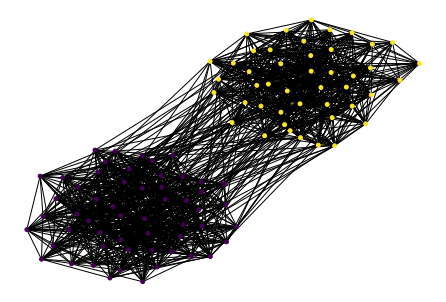

In [71]:
nx.draw(graph2, node_size=15, node_color=labels2)
plt.show()

### Analysis and comparison of both datasets

Fiedler Vector: The eigenvector corresponding to second smallest eigenvalue of Laplacian matrix, L, is called Fiedler Vector. If the graph has two modules then it bisects the graph into only two communities based on the sign of the corresponding vector entry.

If we plot the sorted Fiedler Vector it the communities in the graphs will be clearly visible. For example for a graph with 1000 nodes and two communities the graph for sorted Fiedler vector might look like this.

Sparsity Pattern                                                                   
Sorted Fiedler Vector

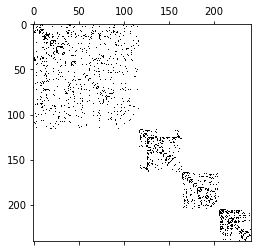

In [109]:
plt.spy(A); #sparsity pattern

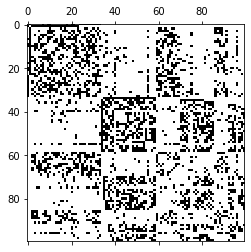

In [110]:
plt.spy(A2);

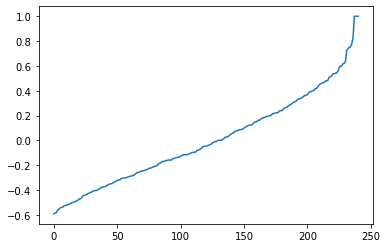

In [129]:
plt.plot(range(len(eigenvalues)),eigenvalues) #sorted eigenvalues


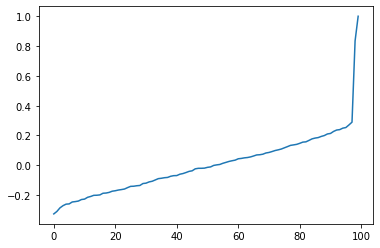

In [130]:
plt.plot(range(len(eigenvalues2)),eigenvalues2) #sorted fiedler vector


The Fiedler vector of a connected undirected graph is the eigenvector corresponding to the second smallest eigenvalue of the Laplacian matrix of the graph.

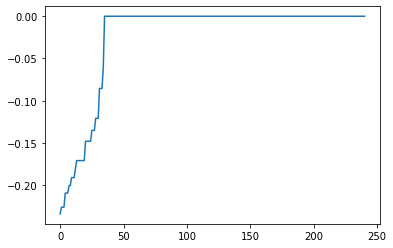

In [174]:
fiedler = sorted(eigenvectors[:, -k]) # take the k-th "column"
plt.plot(range(len(fiedler)),fiedler) #sorted fiedler vector???
plt.show()

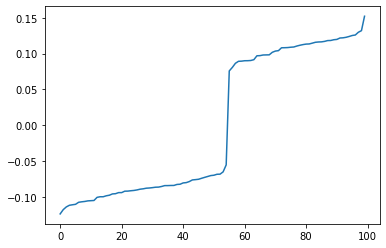

In [175]:
fiedler = sorted(eigenvectors2[:, -k]) # take the k-th "column"
plt.plot(range(len(fiedler2)),fiedler2) #sorted fiedler vector
plt.show()